In [1]:
options(repr.plot.width=8, repr.plot.height=4)

In [2]:
data <- scan("http://robjhyndman.com/tsdldata/hurst/precip1.dat", skip=1)
data.ts <- ts(data, start=c(1813))

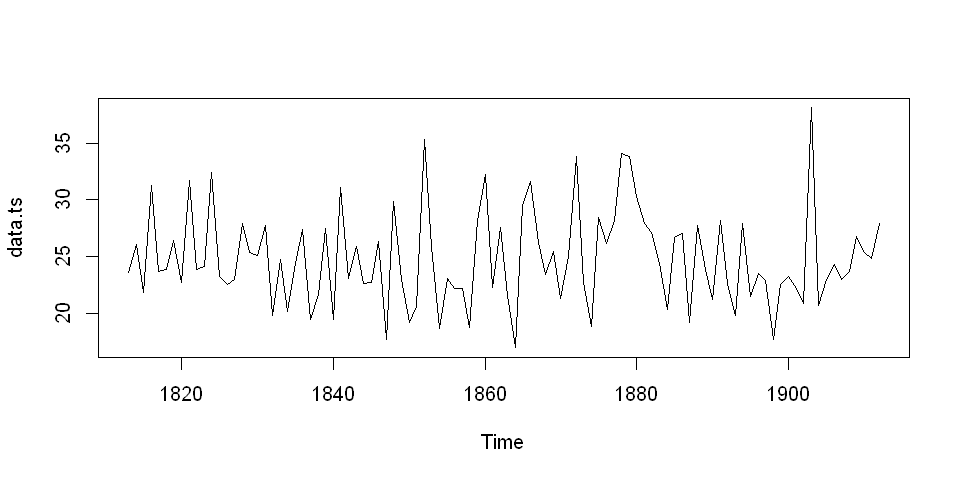

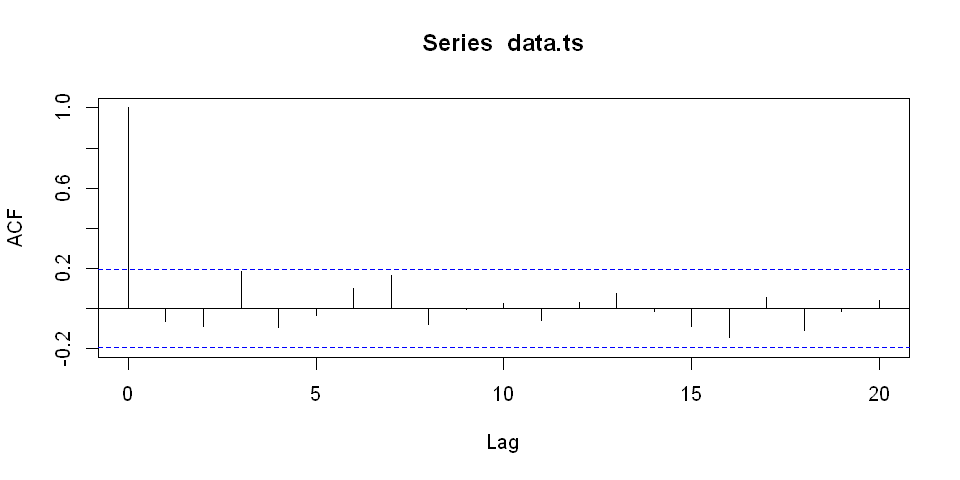

In [3]:
plot(data.ts)
acf(data.ts)

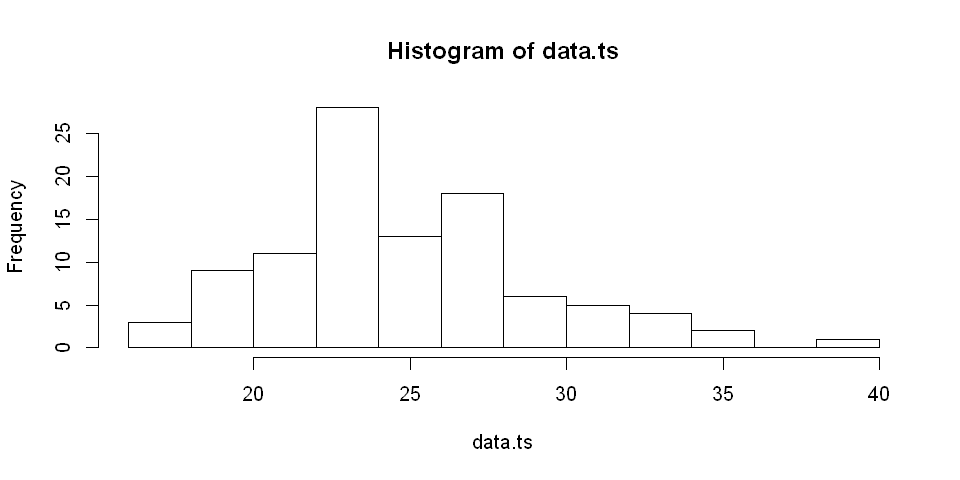

In [4]:
hist(data.ts)

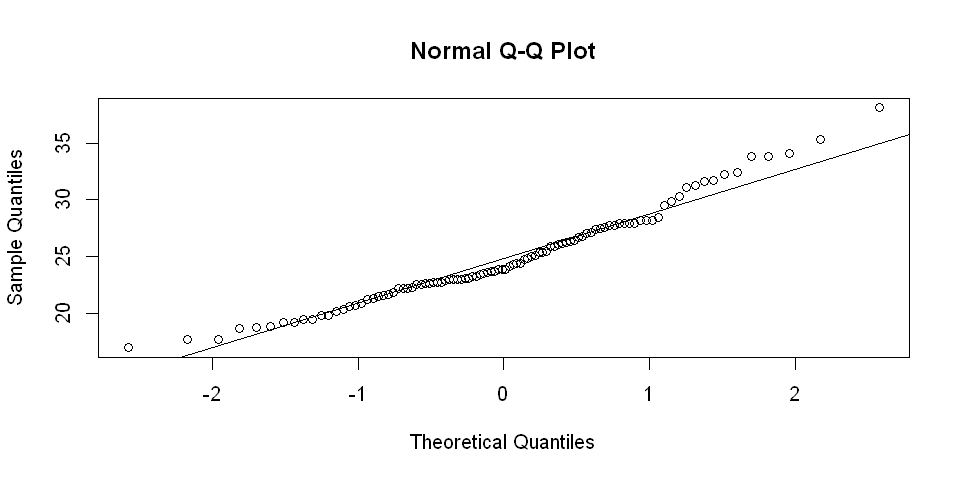

In [5]:
qqnorm(data.ts)
qqline(data.ts)

In [6]:
suppressMessages(library(forecast))

auto.arima(data.ts)

Warning message:
"package 'forecast' was built under R version 3.6.1"

Series: data.ts 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
         mean
      24.8239
s.e.   0.4193

sigma^2 estimated as 17.76:  log likelihood=-285.25
AIC=574.49   AICc=574.61   BIC=579.7

In [7]:
forcast.simple <- function(data, alpha) {
    values <- NULL
    values[1] <- data[1]
    for (i in 1:length(data)) {
        values[i+1] <- alpha * data[i] + (1 - alpha) * values[i]
    }
    return(values)
}

In [8]:
forecast.values <- forcast.simple(data, 0.2)
tail(forecast.values, n=1)

[1] 25.30941

In [9]:
sse <- NULL
n <- length(data.ts)
alphas <- seq( .001, .999, by=0.001)

for (i in 1:length(alphas)) {
    forecast.values <- forecast.values <- forcast.simple(data, alphas[i])
    sse[i] <- sum((data.ts[1:n] - forecast.values[1:n])^2)
}

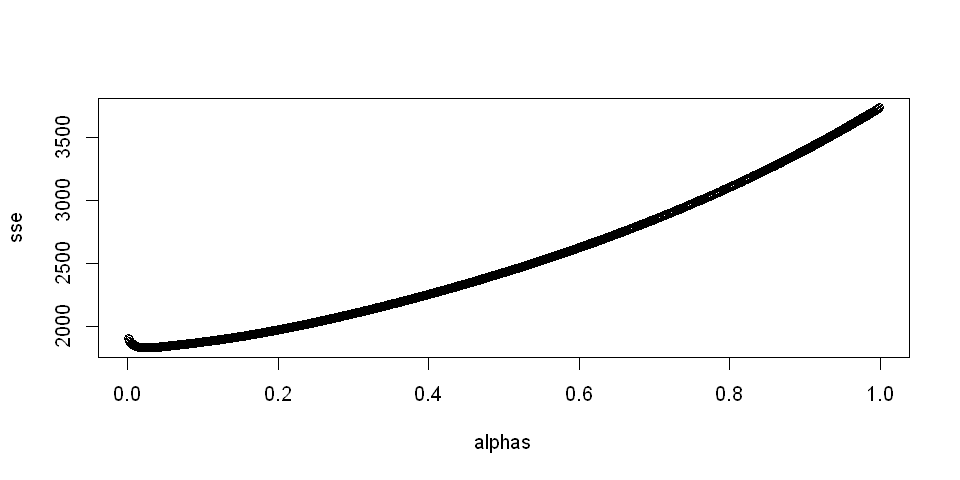

In [10]:
plot(sse ~ alphas)

In [11]:
alphas[which.min(sse)]

[1] 0.024

In [12]:
model <- HoltWinters(data.ts, beta=FALSE, gamma=FALSE)
model

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = data.ts, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819